# **Arbeidskrav 1 av Jonas Andre Andersen**
## **Oppgaver 7.1**

### Oppgave 1a

In [1]:
#laster in pakker
import pandas as pd #pandas
import numpy as np #numpy

#laster in datasett fra csv fil
df=pd.read_csv("https://uit-sok-1006-v23.github.io/data/suits_watermelons.csv",delimiter=";") #skille for kolonne ;

#lager nye variabler
df["p"] = np.exp(df["log p"]) #lager p: antilog av log p
df ["q"] = np.exp(df["log q"]) #lager q: antolog av q
df ["h"] = np.exp(df["log h"]) #lager h: antolog av h (for å kunne gjenskape figur 1, selv om dette ikke direkte står i oppgavesettet.)

### Oppgave 1b

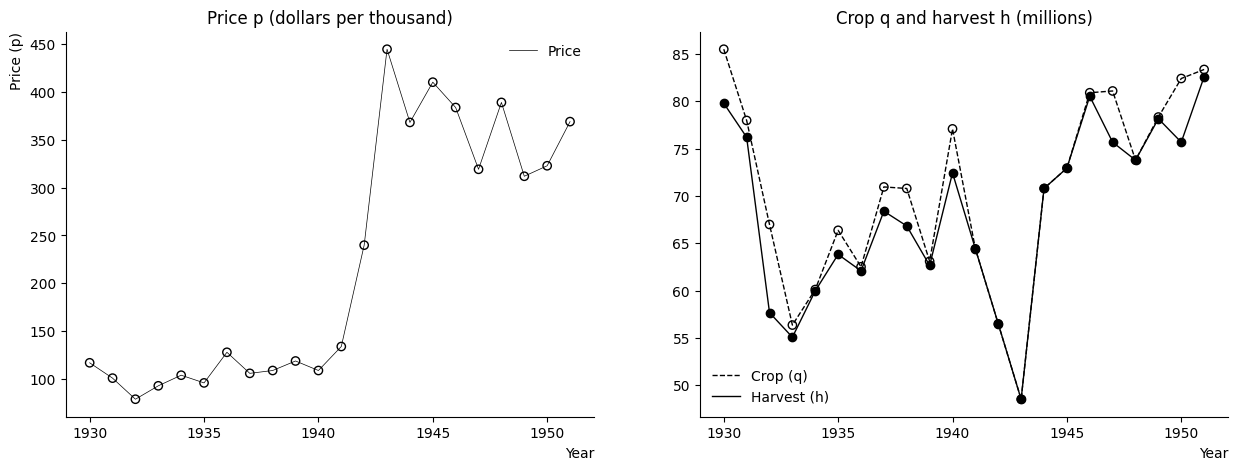

In [2]:
#laster inn pyplot fra matplotlib
from matplotlib import pyplot as plt

#definerer panel til plot
def skap_akse():
                fig, axs = plt.subplots(1,2, sharey=False, figsize=(15,5))
                for i in range(2): #felles for begge plott
                    axs[i].spines['top'].set_color('none') #fjerner ramme øvre
                    axs[i].spines['right'].set_color('none') #fjerner ramme høyre
                    axs[i].set_xlabel('Year', loc='right') #x akse tittel
                return fig, axs

fig, axs = skap_akse() #lager figur

#panel 1
axs[0].plot(df["Year"], df["p"], color = "black", linewidth=0.5, label="Price") #plotter pris for vannmelom over tid (linje)
axs[0].scatter(df["Year"], df["p"], color = "black", facecolors='none', linewidth= 1) #plotter pris for vannmelom over tid (scatter)

axs[0].set_ylabel('Price (p)', loc='top') #setter y akse tittel
axs[0].title.set_text("Price p (dollars per thousand)") #subplot tittel
axs[0].legend(loc='best',frameon=False) #legende

#panel 2
axs[1].plot(df["Year"], df["q"], color = "black", linewidth=1, linestyle="dashed", label="Crop (q)") #plotter crop (q) for vannmelom over tid (linje)
axs[1].scatter(df["Year"], df["q"], color = "black", facecolors='none', linewidth= 1) #plotter crop (q) for vannmelom over tid (scatter)

axs[1].plot(df["Year"], df["h"], color= "black", linewidth=1, label="Harvest (h)") #plotter harvest (h) for vannmelom over tid (linje)
axs[1].scatter(df["Year"], df["h"], color= "black", linewidth=1) #plotter harvest (h) for vannmelom over tid (scatter)

axs[1].title.set_text("Crop q and harvest h (millions)") #subplot tittel
axs[1].legend(loc='best',frameon=False) #legende

### Oppgave 2a

In [3]:
def q_func(): #lager en liste med tall fra 0-100 med differanse 5.
   return [x + x*4 for x in range(21)]

q = [i for i in q_func() if i >= 20] #lager liste q fra funksjon med verdier fra 20 til 100 (med differanse 5)

#lager datasett
df2 = pd.DataFrame(q, columns=["q"]) #lager dataframe med q 


### Oppgave 2b

In [4]:
df2["log_q"] = np.log(df2["q"]) #lager log q 
df2["supply(log_p)"] = -2.0+1.7*df2["log_q"] #lager supply (log_p) 
df2["demand(log_p)"] = 8.5-0.82*df2["log_q"] #lager lager demand (log_p) 

### Oppgave 2c

In [5]:
df2["supply(p)"] = np.exp(df2["supply(log_p)"]) #lager supply (p) 
df2["demand(p)"] = np.exp(df2["demand(log_p)"]) #lager demand (p) 

### Oppgave 2d

Text(0.5, 1.0, 'Supply/Demand for watermelons')

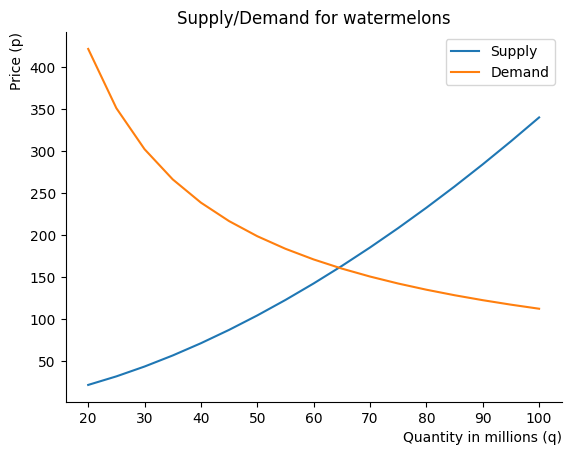

In [6]:
#plot
#definerer nytt panel i form av funksjon
def create_ax2():
                fig, ax = plt.subplots() #skaper figur
                ax.set_ylabel('Price (p)', loc='top') #y akse tittel
                ax.set_xlabel('Quantity in millions (q)', loc='right') #x akse tittel
                ax.spines['top'].set_color('none') #fjerner topp av boks
                ax.spines['right'].set_color('none') #fjerner høyre side av boks
                
                return fig, ax

#lager panel
fig, ax = create_ax2()
#plot
ax.plot(df2["q"], df2["supply(p)"], label = "Supply") #plotter supply
ax.plot(df2["q"], df2["demand(p)"], label = "Demand") #plotter demand
ax.legend(loc="best") #legende
ax.set_title("Supply/Demand for watermelons") #tittel

### Oppgave 3a

In [7]:
#legger til mer i dataframe fra oppg 2
df2["new_supply(log_p)"] = -2.0+(1.7*df2["log_q"])+0.4 #lager ny supply (log_p) 
df2["new_supply(p)"] = np.exp(df2["new_supply(log_p)"])

### Oppgave 3b

Text(0.5, 1.0, 'Supply/Demand for watermelons')

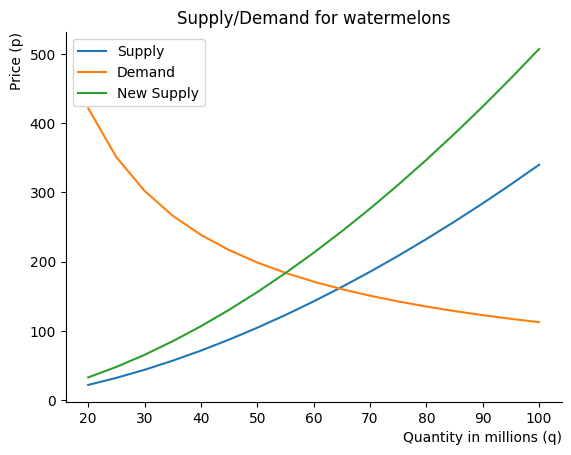

In [8]:
#lager panel
fig, ax = create_ax2() #tidligere definert funksjon
#plot
ax.plot(df2["q"], df2["supply(p)"], label = "Supply") #plotter supply
ax.plot(df2["q"], df2["demand(p)"], label = "Demand") #plotter demand
ax.plot(df2["q"], df2["new_supply(p)"], label="New Supply") #plotter ny supply
ax.legend(loc="best") #legende
ax.set_title("Supply/Demand for watermelons") #tittel

## **Oppgaver 7.2**

### Oppgave 1a

In [9]:
import sympy as sp #importerer sympy

log_q, log_p = sp.symbols("log_q, log_p") #definerer sympy symboler

eq1 = sp.Eq(-2 + 1.7*log_q, log_p) #lager likning

print(str(sp.solve(eq1, log_q)[0])) #løser likning mhp log_q, slik at vi får en funksjon av kvantum.

print("Priselastisiteten er konstanten vi mulitpliserer med log(p), og ved dermed at priselastisiteten til tilbudet er 0.588.")
print("Utifra dette kan vi si at dersom vi øker prisen med 1%, økes tilbudet med 0.588%, med andre ord er tilbudet uelastisk.")


0.588235294117647*log_p + 1.17647058823529
Priselastisiteten er konstanten vi mulitpliserer med log(p), og ved dermed at priselastisiteten til tilbudet er 0.588.
Utifra dette kan vi si at dersom vi øker prisen med 1%, økes tilbudet med 0.588%, med andre ord er tilbudet uelastisk.


### Oppgave 1b

In [10]:
eq2 = sp.Eq(8.5-0.82*log_q, log_p) #lager likning med symboler fra 1a

print(str(sp.solve(eq2, log_q)[0])) #løser likning mhp log_q, slik at vi får en funksjon av kvantum.
print("Priselastisiteten er konstanten vi mulitpliserer med log(p), og ved dermed at priselastisiteten til etterspørselen er -1.22.")
print("Utifra dette kan vi si at dersom vi øker prisen med 1%, reduseres etterspørselen med 1.22%, med andre ord er etterspørselen elastisk. (Følsom for prisendring.)")


10.3658536585366 - 1.21951219512195*log_p
Priselastisiteten er konstanten vi mulitpliserer med log(p), og ved dermed at priselastisiteten til etterspørselen er -1.22.
Utifra dette kan vi si at dersom vi øker prisen med 1%, reduseres etterspørselen med 1.22%, med andre ord er etterspørselen elastisk. (Følsom for prisendring.)


### Oppgave 2
Utifra likningen og tabellen kan vi se hvordan de ulike variablene påvirker den totale priselastisiteten. Fra dette kan vi si at dersom prisen på vannmelon øker med 1%, økes tilbudet med 0.58%. Videre ser vi dersom prisen på bomull øker med 1%, reduseres tilbudet på vannmelon med 0.321%. Dersom prisen på grønnsaker øker med 1%, reduseres tilbudet av vannmelon med 0.124%. Vi har også dummyvariabler som påvirker tilbudet av vannmelon. Da cotton programmet ble gjennomført, økte tilbudet av vannmelon med 0.073%. I tillegg har vi andre verdenskrig som dummy variabel. Under 2. verdenskrig ble tilbudet av vannmelon redusert med 0.36%.


### Oppgave 3
Utifra likningen for etterspørselen og tabellen kan vi se hvordan de ulike faktorene påvirker etterspørselen for vannmelon. Dersom prisen for vannmelon øker med 1%, faller etterspørselen med 1.125%. Videre ser vi at dersom inntekten per innbygger øker med 1%, stiger etterspørselen etter vannmelon med 1.75%. Sist i tabellen ser vi at dersom fraktkostnaden via tog øker med 1%, faller etterspørselen av vannmelon med 0.968%.

### Oppgave 4
Utifra tabellen for tilbud, ser vi at vi har to dummy variabler som enten er 0 eller 1. I perioden disse var 1, fikk vi et skift i tilbudet. En økning i tilbudet av vannmelon når CP variabelen var 1. (Cotton program). Dette vil tilsi et venstreskift. Når WW2 variabelen var 1 (Under krigen) fikk vi en reduksjon i tilbudet av vannmelon. Dette vil tilsi et høyreskift.